In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('V3.csv')

In [4]:
df.head(10)

,DATE_ID,CAMPAIGN,KEYWORD,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag,CAMP_ID,week,KW_ID,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded
0,20170521,Non Brand | Condition | Geo,symptoms of asthma,2.08,3.0,1.80,51.0,5.40,0.058824,1.0,1,7,1,2.0,0,1,0,0,1
1,20170521,Brand,product1 spacer,1.00,0.0,0.00,2.0,0.00,0.000000,0.0,2,7,2,2.0,0,1,0,1,0
2,20170521,Non Brand | Treatment | National,how to prevent asthma,1.48,0.0,0.00,4.0,0.00,0.000000,0.0,3,7,3,2.0,0,1,0,0,1
3,20170521,Non Brand | Info | Geo,facts about asthma,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,4,7,4,2.0,1,0,0,0,1
4,20170521,Non Brand | Condition | Geo,asthma symptoms in children,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,1,7,5,2.0,1,0,0,0,1
5,20170521,Non Brand | Treatment | Geo,how to reduce asthma symptoms,2.00,0.0,0.00,1.0,0.00,0.000000,0.0,5,7,6,2.0,0,1,0,0,1
6,20170521,Non Brand | Condition | Geo,breathing with asthma,2.00,1.0,3.71,4.0,3.71,0.250000,1.0,1,7,7,2.0,0,1,0,0,1
7,20170521,Non Brand | Competitor | Geo,alternatives to competitor6,4.00,0.0,0.00,1.0,0.00,0.000000,0.0,6,7,8,2.0,0,1,0,0,1
8,20170521,Non Brand | Product | Geo,best inhaler for asthma,3.31,0.0,0.00,7.0,0.00,0.000000,0.0,7,7,9,2.0,0,1,0,0,1
9,20170521,Non Brand | Product | Geo,asthmatic inhalers,4.00,0.0,0.00,3.0,0.00,0.000000,0.0,7,7,10,2.0,0,1,0,0,1


#### Review top 100 keywords

In [5]:
df.KEYWORD.value_counts()

asthma inhalers                     1771
asthma medications                  1725
inhalers for asthma                 1713
asthma relief                       1688
asthma symptoms                     1678
                                    ... 
what is th20asthma                     1
product1 official website              1
daily product1 asthma medication       1
product1 medication for asthma         1
how to avoid asthma attacks            1
Name: KEYWORD, Length: 1994, dtype: int64

In [6]:
from collections import Counter
z = Counter(df.KW_ID).most_common(1000)

In [7]:
Counter(df.KEYWORD).most_common(100)

[('asthma inhalers', 1771),
 ('asthma medications', 1725),
 ('inhalers for asthma', 1713),
 ('asthma relief', 1688),
 ('asthma symptoms', 1678),
 ('asthma medication', 1644),
 ('asthma coughing', 1618),
 ('asthma action plan', 1614),
 ('asthma symptom', 1605),
 ('what is asthma', 1601),
 ('symptoms of asthma', 1598),
 ('asthma inhaler', 1597),
 ('asthma medicine', 1581),
 ('asthma treatment', 1577),
 ('help asthma', 1551),
 ('asthma medicines', 1539),
 ('competitor5 inhaler', 1489),
 ('asthma triggers', 1481),
 ('competitor6 inhaler', 1477),
 ('what causes asthma', 1476),
 ('asthma control', 1466),
 ('treatment for asthma', 1444),
 ('over the counter asthma inhalers', 1443),
 ('medicine for asthma', 1433),
 ('asthma treatments', 1430),
 ('cause asthma', 1430),
 ('how to treat asthma', 1427),
 ('help with asthma', 1420),
 ('symptom of asthma', 1406),
 ('inhalation aerosol', 1401),
 ('asthma prevention', 1389),
 ('signs of asthma', 1376),
 ('medications for asthma', 1369),
 ('product1', 

In [8]:
u = []
for i in range(1000):
    u.append(z[i][0])
u

[151,
 198,
 110,
 20,
 207,
 483,
 112,
 28,
 78,
 278,
 1,
 47,
 108,
 114,
 358,
 91,
 66,
 331,
 490,
 188,
 266,
 431,
 245,
 77,
 54,
 85,
 377,
 275,
 56,
 38,
 22,
 340,
 70,
 385,
 383,
 229,
 338,
 75,
 370,
 161,
 120,
 162,
 154,
 69,
 472,
 339,
 150,
 233,
 37,
 201,
 268,
 33,
 83,
 96,
 169,
 164,
 136,
 173,
 288,
 92,
 202,
 3,
 174,
 72,
 203,
 50,
 442,
 337,
 237,
 13,
 276,
 240,
 248,
 131,
 80,
 253,
 251,
 447,
 607,
 62,
 224,
 49,
 440,
 425,
 128,
 58,
 361,
 40,
 342,
 384,
 458,
 88,
 264,
 130,
 393,
 571,
 696,
 211,
 68,
 378,
 422,
 608,
 176,
 395,
 63,
 205,
 521,
 146,
 334,
 26,
 208,
 16,
 180,
 352,
 656,
 467,
 433,
 460,
 452,
 57,
 10,
 166,
 221,
 101,
 534,
 250,
 242,
 410,
 418,
 728,
 420,
 109,
 462,
 718,
 122,
 330,
 406,
 121,
 86,
 529,
 479,
 137,
 686,
 156,
 230,
 316,
 31,
 274,
 11,
 491,
 533,
 277,
 372,
 523,
 5,
 133,
 1819,
 134,
 163,
 204,
 394,
 698,
 93,
 739,
 315,
 290,
 675,
 24,
 124,
 332,
 468,
 157,
 184,
 324,
 

In [9]:
df0 = df.loc[df['KW_ID'].isin(u)]
df0.shape

(463533, 19)

#### Train/Test split

In [10]:
df.Flag.value_counts()

0.0    405574
1.0     83193
Name: Flag, dtype: int64

In [ ]:
#Remove CPC and keep media_cost
X = df.drop(['DATE_ID','CAMPAIGN','KEYWORD','IMPRESSIONS','CTR','Flag','CLICKS','CPC'],axis=1)
Y = df['Flag'].values

In [ ]:
X['CAMP_ID'].isnull().sum()

In [13]:
np.isfinite(Y).all()

True

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=112)

In [15]:
x_train.head()

,_POSITION,CPC,MEDIA_COST,CAMP_ID,week,KW_ID,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded
438534,0.00,0.00,0.00,41,5,1903,1.0,0,1,0,0,1
311963,2.27,0.55,1.09,5,7,233,3.0,1,0,0,0,1
221513,2.00,0.00,0.00,1,2,1419,4.0,0,1,0,0,1
256924,3.00,0.00,0.00,6,6,1102,3.0,0,1,0,0,1
443547,3.00,0.00,0.00,11,7,56,1.0,0,1,0,0,1


#### Random Forest Classifier predicting CTR Flag

In [16]:
clf = RandomForestClassifier(max_depth=15, random_state=113)

In [17]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=113)

In [18]:
y_pred_class = clf.predict(x_test)

In [19]:
y_pred_prob = clf.predict_proba(x_test)[:,1]

In [20]:
importances = clf.feature_importances_

In [21]:
indices = np.argsort(importances)[::-1]

In [ ]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    121610
         1.0       0.91      0.99      0.95     25021

    accuracy                           0.98    146631
   macro avg       0.96      0.99      0.97    146631
weighted avg       0.98      0.98      0.98    146631



In [24]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[119234,   2376],
       [   219,  24802]], dtype=int64)

In [26]:
metrics.accuracy_score(y_test, y_pred_class)

0.982302514475111

In [27]:
sk.metrics.roc_auc_score(y_test, y_pred_prob)

0.9977353955659731

In [28]:
y_pred_train = clf.predict(x_train)

print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    283964
         1.0       0.93      1.00      0.96     58172

    accuracy                           0.99    342136
   macro avg       0.96      0.99      0.98    342136
weighted avg       0.99      0.99      0.99    342136



In [29]:
false_positive_rate, true_positive_rate, threshold = sk.metrics.roc_curve(y_test, y_pred_prob)

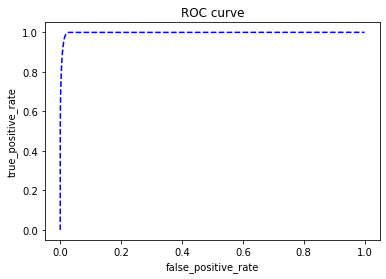

In [30]:
plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, color='b', ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

#### XGboost Classifier predicting CTR Flag

In [31]:
param_grid = {"n_estimators":[i*20 for i in range(5,100)], "learning_rate": [i*0.1 for i in range(1,17)], 
              "max_depth": [1,2,3], "gamma": [i*0.2 for i in range(0,30)]}

In [32]:
from xgboost import XGBClassifier

In [33]:
bst = XGBClassifier(random_state=223)

In [34]:
bst_Grid = sk.model_selection.RandomizedSearchCV(bst, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 5)

In [35]:
x_train.KW_ID = pd.to_numeric(x_train.KW_ID)
x_train.CAMP_ID = pd.to_numeric(x_train.CAMP_ID)
x_train.KW_ID.dtype, x_train.CAMP_ID.dtype

C:\Users\zjx04\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(dtype('int64'), dtype('int64'))

In [36]:
bst_Grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 48.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                                  5.800000000000001],
                                        'learning_rate': [0.1, 0.2,
                                           

In [37]:
bst_Grid.best_params_

{'n_estimators': 460, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.4}

In [38]:
x_test.KW_ID = pd.to_numeric(x_test.KW_ID)
x_test.CAMP_ID = pd.to_numeric(x_test.CAMP_ID)

C:\Users\zjx04\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
y_pred_xg = bst_Grid.best_estimator_.predict(x_test)
y_pred_xgprob = bst_Grid.best_estimator_.predict_proba(x_test)[:,1]

In [40]:
bst_Grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=460, n_jobs=0, num_parallel_tree=1, random_state=223,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
metrics.confusion_matrix(y_test, y_pred_xg)

array([[119622,   1988],
       [   454,  24567]], dtype=int64)

In [42]:
print(metrics.classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    121610
         1.0       0.93      0.98      0.95     25021

    accuracy                           0.98    146631
   macro avg       0.96      0.98      0.97    146631
weighted avg       0.98      0.98      0.98    146631



In [43]:
sk.metrics.roc_auc_score(y_test, y_pred_xgprob)

0.9978817508776552

In [44]:
metrics.accuracy_score(y_test, y_pred_xg)

0.9833459500378501

In [45]:
y_pred_trainxg = clf.predict(x_train)

print(metrics.classification_report(y_train, y_pred_trainxg))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    283964
         1.0       0.93      1.00      0.96     58172

    accuracy                           0.99    342136
   macro avg       0.96      0.99      0.98    342136
weighted avg       0.99      0.99      0.99    342136



In [46]:
false_positive_rate, true_positive_rate, threshold = sk.metrics.roc_curve(y_test, y_pred_xgprob)

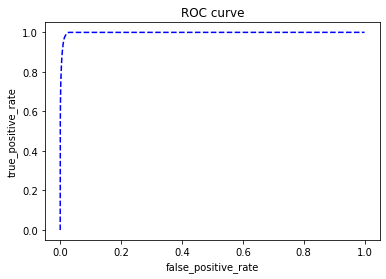

In [47]:
plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, color='b', ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()